In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
mpl.rc('font', size=12)

from numba import njit

%run voter_model_with_mutation.ipynb

# Voter model with mutation
### For sizes L = 100, L = 200, L = 400

In [14]:
# Define parameters as in paper

all_grids = []
all_grids_0 = []
all_num_species = []

list_L = [100, 200, 400]
n_iters = 5e7

for L in list_L:
    K = int(L**(4/3))
    alpha = 1/L**2
    
    grid_0 = init_grid(L)
    grid, num_species = voter_model(grid_0, alpha, n_iters)
    
    all_grids_0.append(grid_0)
    all_grids.append(grid)
    all_num_species.append(num_species)



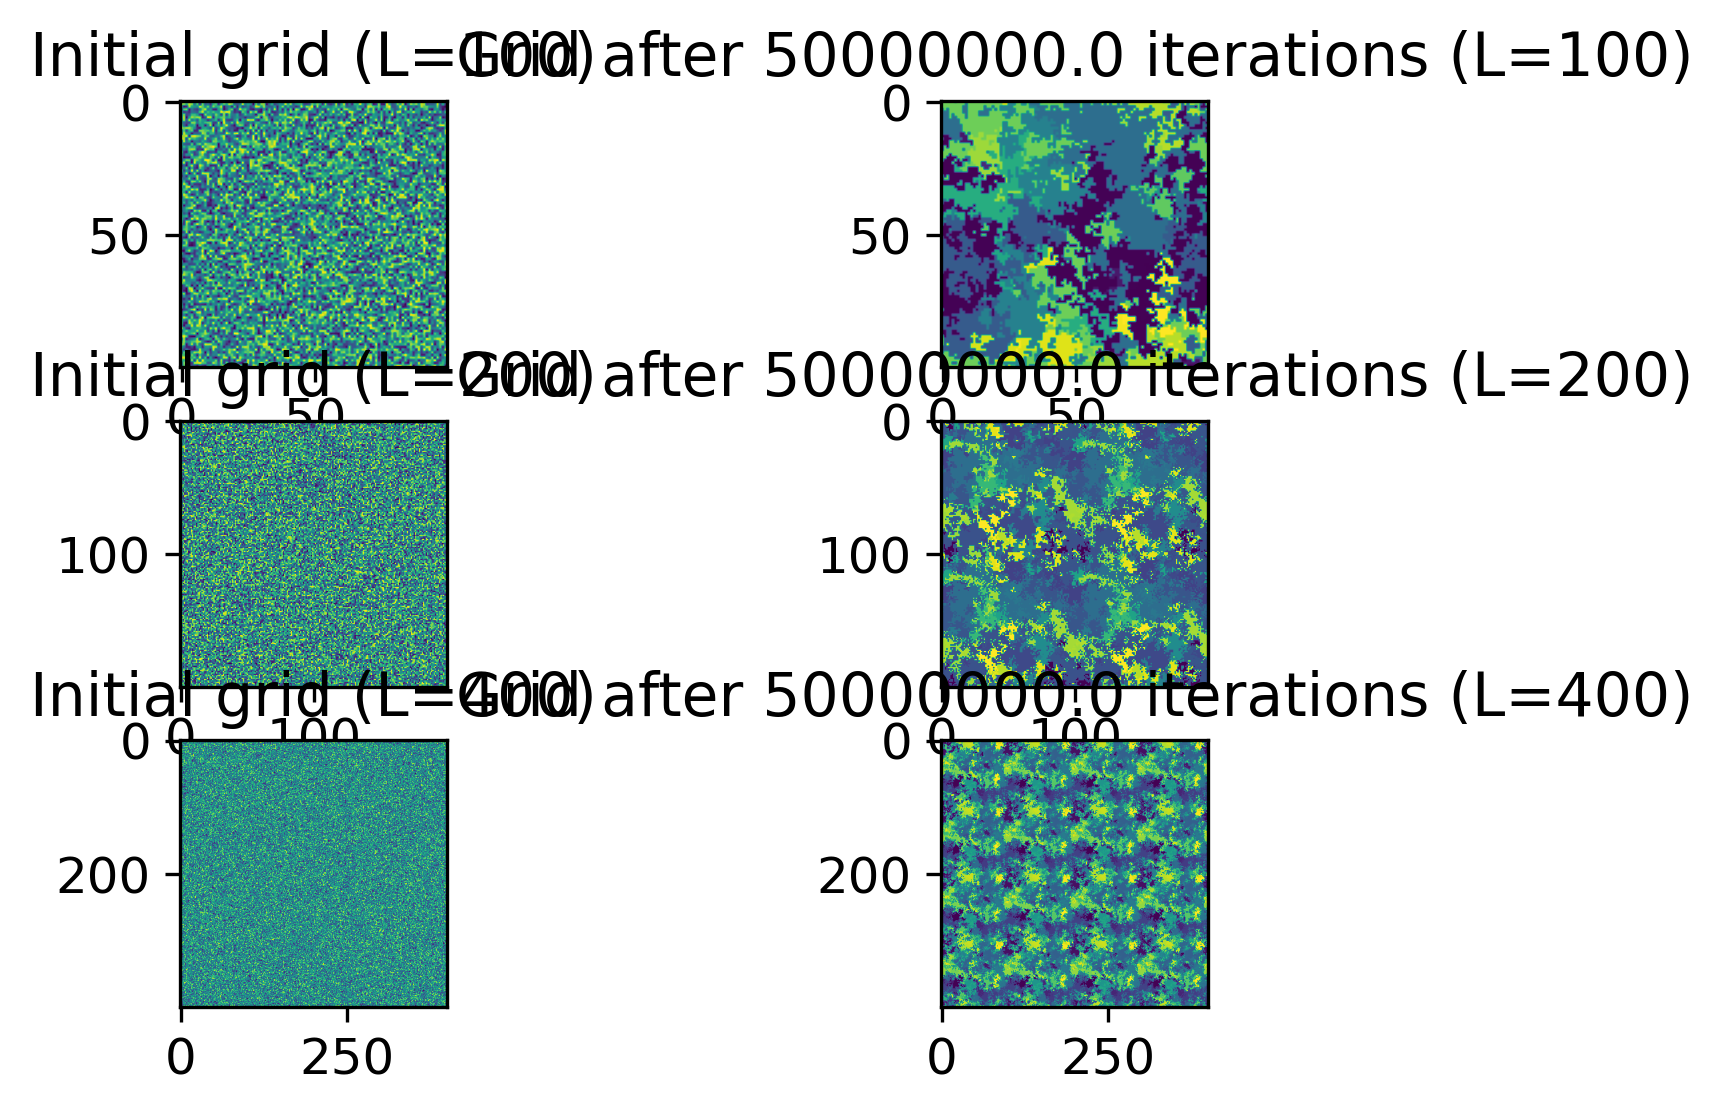

In [15]:
# Plot ecosystem visualization as 2D grid; before vs. after 1000 iterations

plt.subplot(3, 2, 1)
plt.imshow(all_grids_0[0])
plt.title('Initial grid (L=100)')

plt.subplot(3, 2, 2)
plt.imshow(all_grids[0])
plt.title(f'Grid after {n_iters} iterations (L=100)')

plt.subplot(3, 2, 3)
plt.imshow(all_grids_0[1])
plt.title('Initial grid (L=200)')

plt.subplot(3, 2, 4)
plt.imshow(all_grids[1])
plt.title(f'Grid after {n_iters} iterations (L=200)')

plt.subplot(3, 2, 5)
plt.imshow(all_grids_0[2])
plt.title('Initial grid (L=400)')

plt.subplot(3, 2, 6)
plt.imshow(all_grids[2])
plt.title(f'Grid after {n_iters} iterations (L=400)')

plt.show()

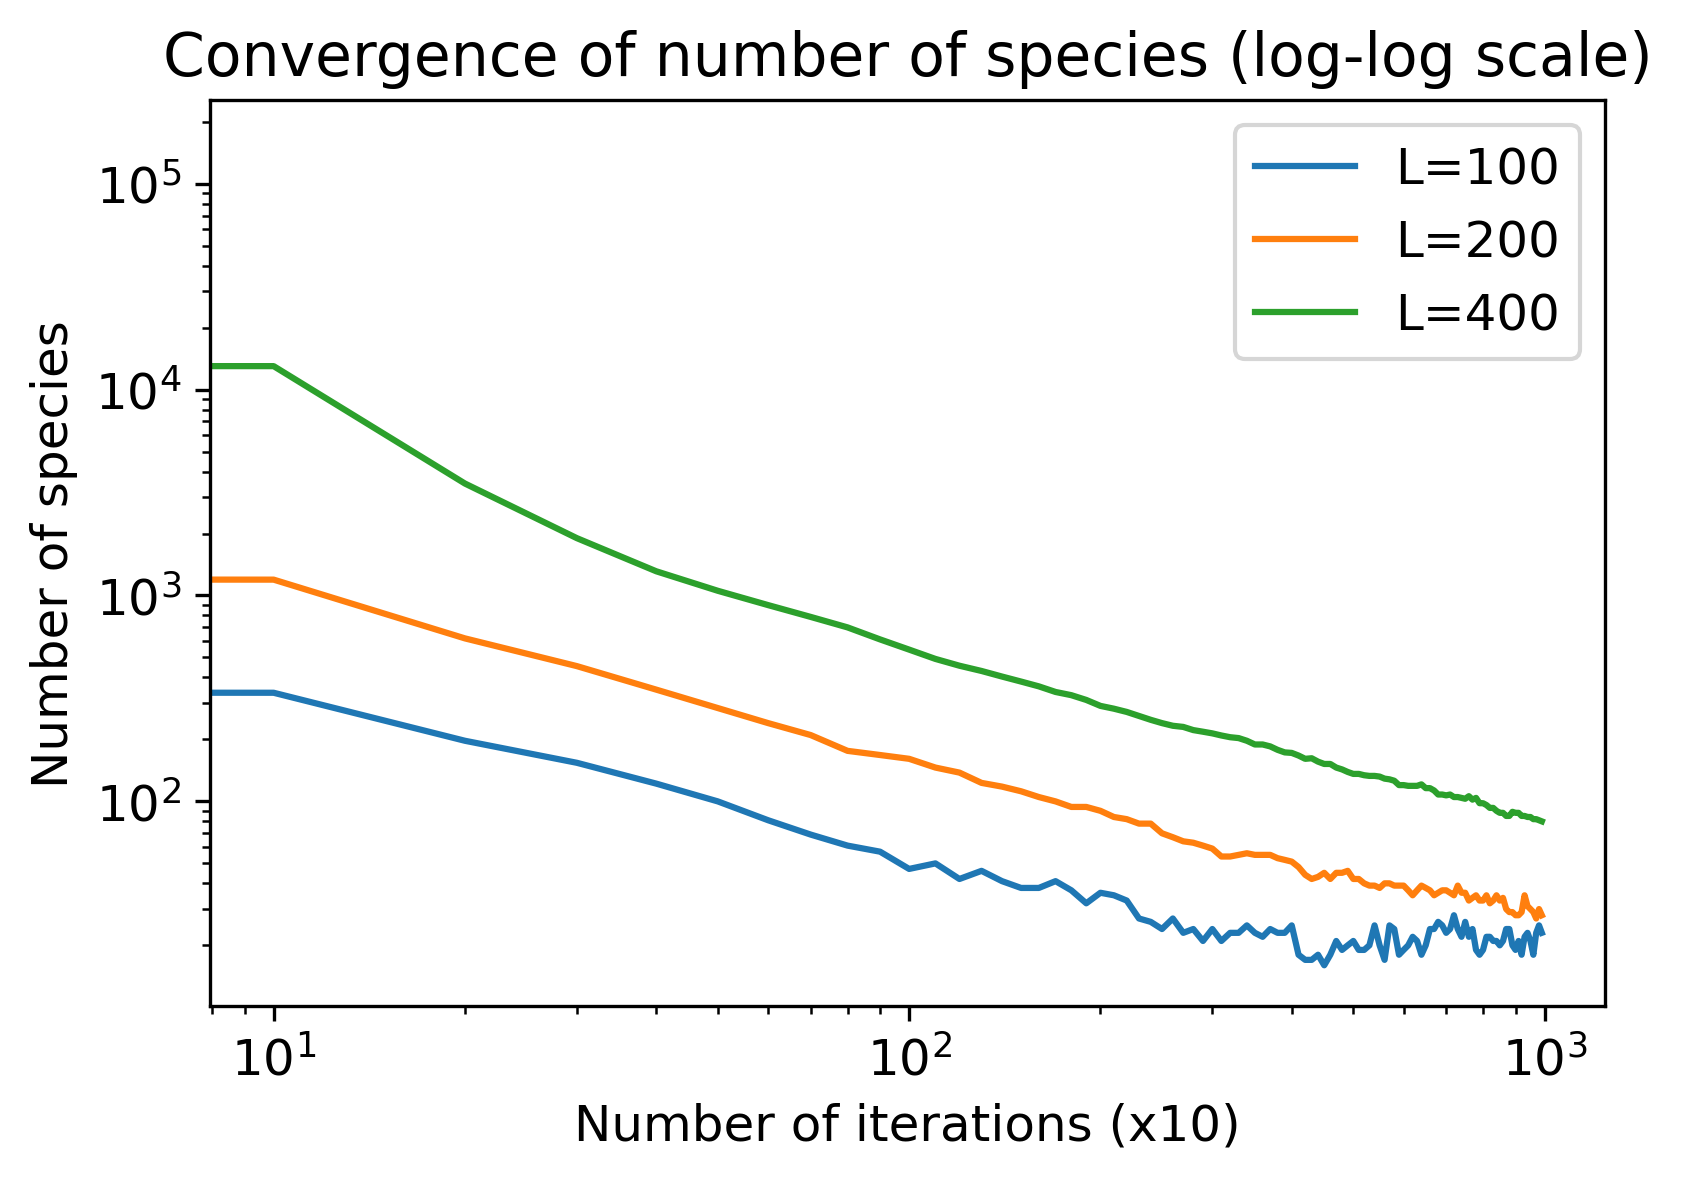

In [16]:
# Plot convergence of number species on log-log scale

plt.loglog(10 * np.arange(len(all_num_species[0])), all_num_species[0])
plt.loglog(10 * np.arange(len(all_num_species[1])), all_num_species[1])
plt.loglog(10 * np.arange(len(all_num_species[2])), all_num_species[2])
plt.legend(['L=100', 'L=200', 'L=400'])
plt.ylabel('Number of species')
plt.xlabel('Number of iterations (x10)')
plt.title('Convergence of number of species (log-log scale)')
plt.show()

In [17]:
def species_area(center, grid):
    areas = []
    species = []

    for i in range(center):
        species.append(len(np.unique(grid[center - i:center + i+1, center - i:center + i+1])))
        areas.append((i+1)**2)

    return species, areas

In [18]:
# Compute number of species and quantify area

center = 49

species100, areas100 = species_area(center, all_grids[0])
species200, areas200 = species_area(center, all_grids[1])
species400, areas400 = species_area(center, all_grids[2])

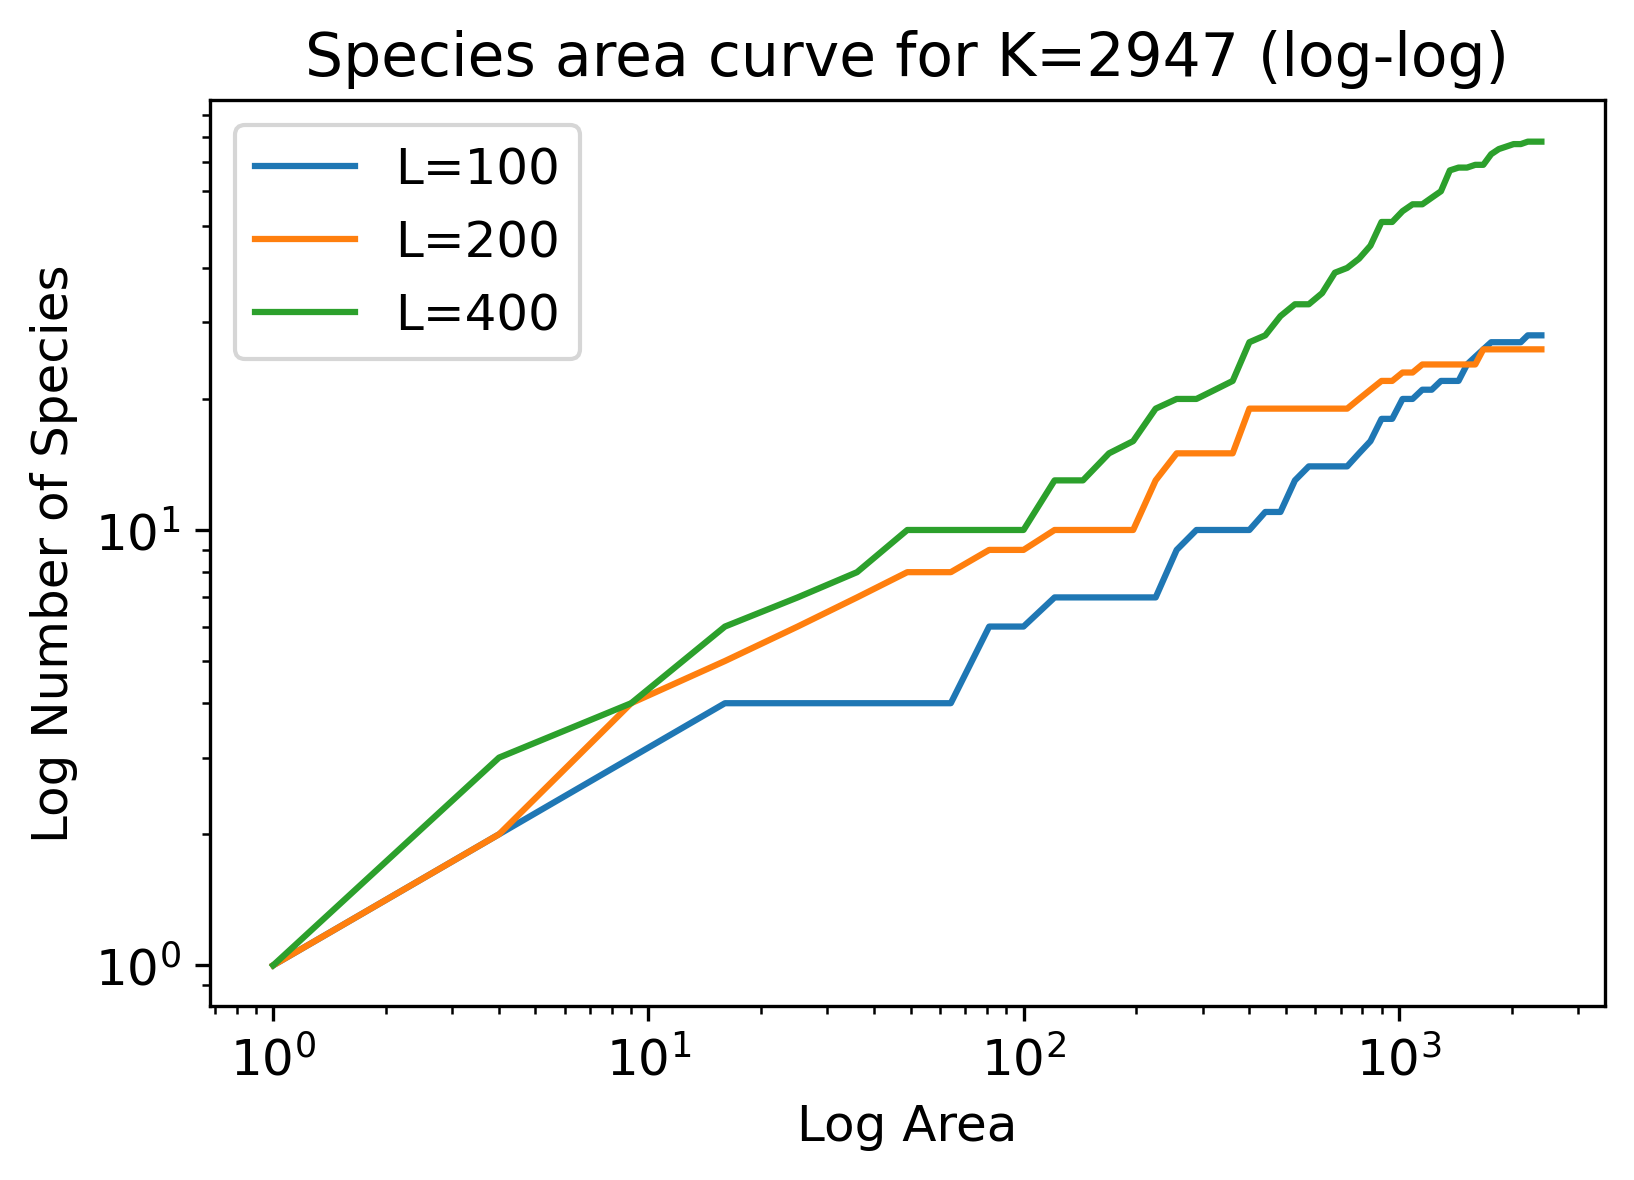

In [19]:
# Plot species-area curve on log-log scale
plt.loglog(areas100, species100)
plt.loglog(areas200, species200)
plt.loglog(areas400, species400)
plt.legend(['L=100', 'L=200', 'L=400'])
plt.ylabel('Log Number of Species')
plt.xlabel('Log Area')
plt.title(f'Species area curve for K={K} (log-log)')
plt.show()

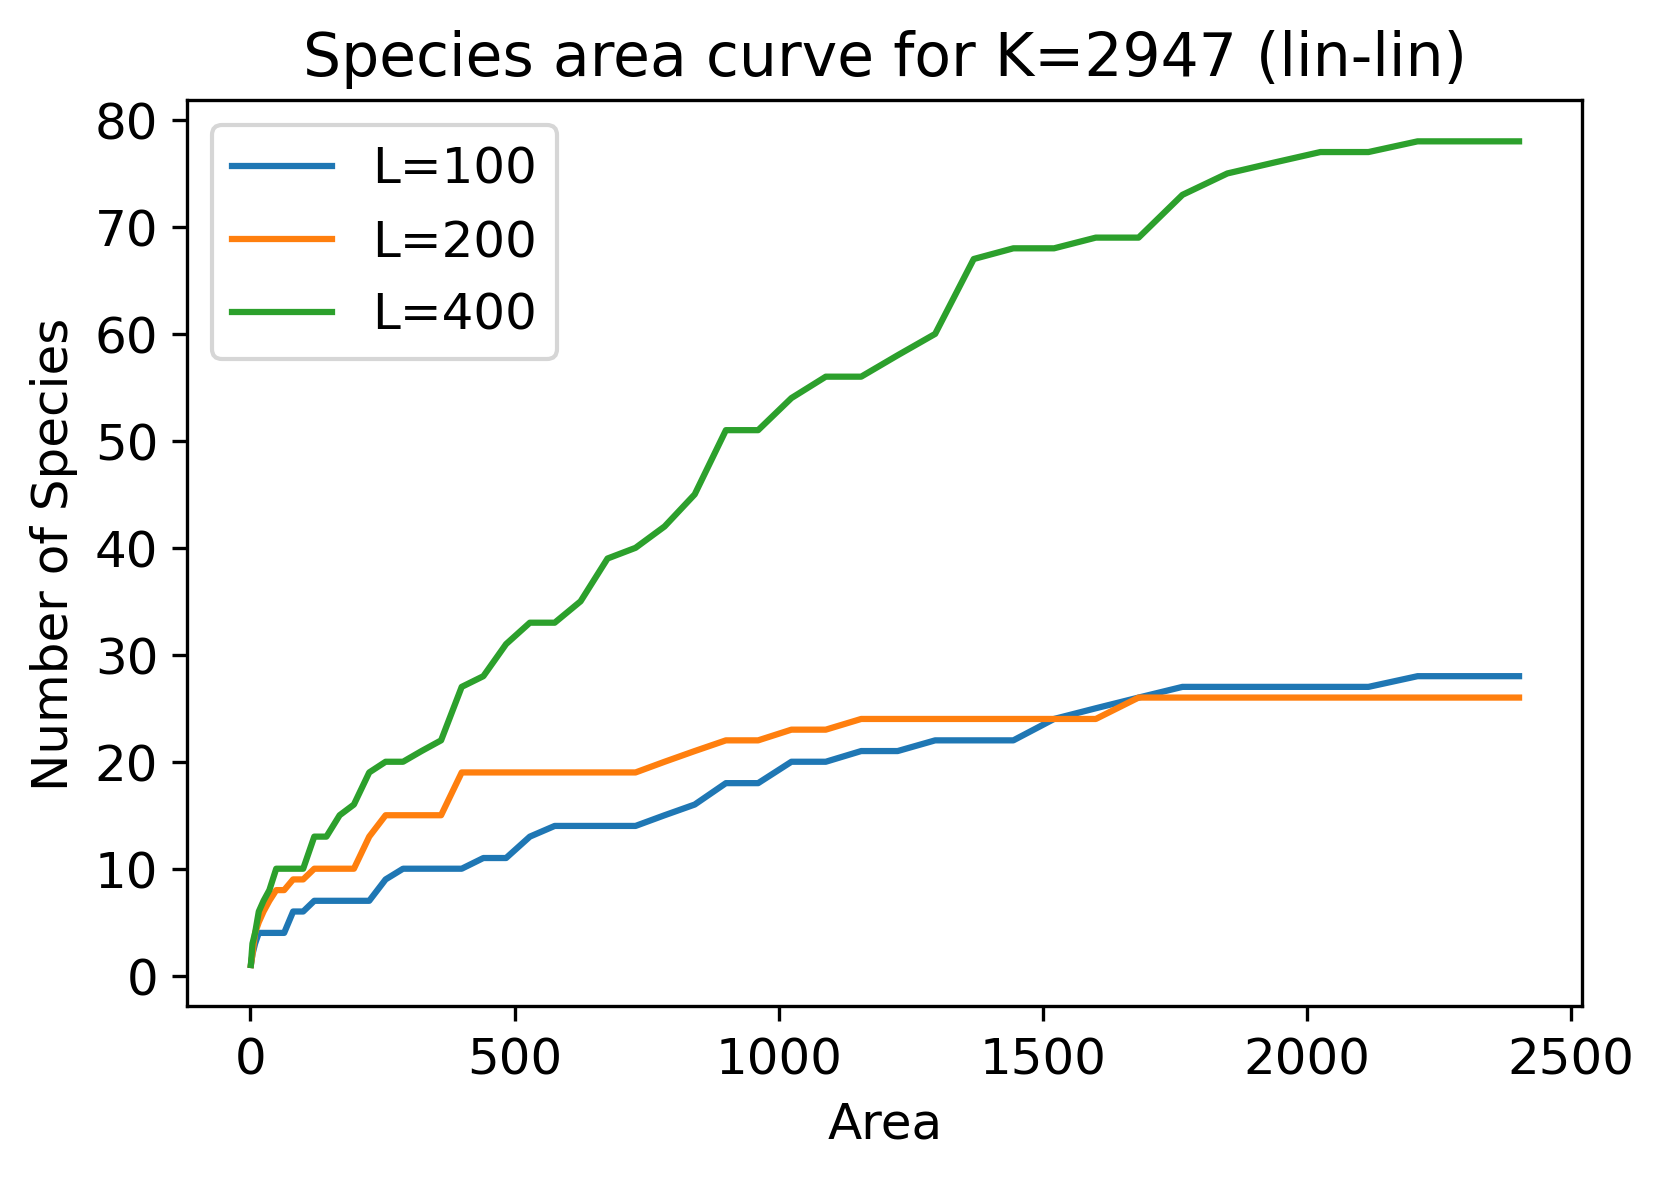

In [20]:
# Plot species-area curve on lin-lin scale
plt.plot(areas100, species100)
plt.plot(areas200, species200)
plt.plot(areas400, species400)
plt.legend(['L=100', 'L=200', 'L=400'])
plt.ylabel('Number of Species')
plt.xlabel('Area')
plt.title(f'Species area curve for K={K} (lin-lin)')
plt.show()